# Quick Study Notebook
Using this notebook, a quick study of the asymmetry can be performed.  

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import os
import pandas as pd 
import sys 
import tempfile

%matplotlib inline

From our local package, let's import the important machinery.  Doing this makes this notebook shorter, but also more consistent.  After doing so, the configuration file is loaded and the options can be changed.  The data is then loaded.  

In [2]:
sys.path.append(os.path.normpath(os.getcwd() + '/../src/data'))
sys.path.append(os.path.normpath(os.getcwd() + '/../src/fit'))
import bsa, utils
import fitter 

In [3]:
config_file = '../config-laptop.json'
config = utils.load_config(config_file)

### Configuration
Make any changes here before the data is loaded to test new things.

In [4]:
for key, value in config.iteritems():
    print(key, value)

(u'database_path', u'/Users/davidriser/repos/python-analysis/kaon-bsa/database/')
(u'variation_file', u'/Users/davidriser/repos/python-analysis/kaon-bsa/variations-missing-mass.json')
(u'file_compression', u'bz2')
(u'axes', [u'x', u'z', u'pt', u'q2', u'missing_mass'])
(u'output_filename', u'/Users/davidriser/repos/python-analysis/kaon-bsa/database/phi/sys.csv')
(u'sample_size', None)
(u'n_bins', 6)
(u'systematics_file', u'/Users/davidriser/repos/python-analysis/kaon-bsa/systematic_sources.pkl')
(u'file_path', u'/Users/davidriser/Data/inclusive/inclusive.csv')
(u'z_range', [0.25, 0.75])


In [5]:
config['sample_size'] = None

In [6]:
# Raw dataset loading
data = utils.load_dataset(config)

# Filtered data 
nom_filter = utils.build_filter(data)
nom_data = utils.build_dataframe(data, nom_filter)

# Bins for axes 
bins = bsa.setup_binning(config, nom_data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13125592 entries, 0 to 13322465
Data columns (total 30 columns):
Unnamed: 0       int64
helicity         int64
meson_id         int64
missing_mass     float64
x                float64
q2               float64
z                float64
pt               float64
w                float64
eta              float64
phi_h            float64
theta_h          float64
p_ele            float64
p_mes            float64
phi_ele          float64
phi_mes          float64
theta_ele        float64
theta_mes        float64
dvz              float64
alpha            float64
dist_ecsf        float64
dist_ec_edep     float64
dist_vz          float64
dist_cc_theta    float64
dist_dcr1        float64
dist_dcr3        float64
dist_ecu         float64
dist_ecv         float64
dist_ecw         float64
dist_cc          float64
dtypes: float64(27), int64(3)
memory usage: 3.0 GB


### Perform Calculation
Here we simply do the calculation, getting the results in a pandas dataframe.  To make things easier, I just save it to a temp file and use the same fitting routines used in the real analysis.

In [7]:
results = utils.get_results(nom_data, bins, config)
results.to_csv('./temp_file.csv')

In [8]:
fitter.fit(
    input_file = 'temp_file.csv', 
    output_file = 'temp_file_fit.csv', 
    bounds = None, 
    n_reps = 8, 
    n_proc = 4
)

Fitting missing_mass
Performing single fit - done in 9s
Performing single fit - done in 7s
Performing single fit - done in 5s
Performing single fit - done in 5s
Performing single fit - done in 9s
Performing single fit - done in 14s
Fitting pt
Performing single fit - done in 4s
Performing single fit - done in 6s
Performing single fit - done in 11s
Performing single fit - done in 11s
Performing single fit - done in 10s
Performing single fit - done in 27s
Fitting q2
Performing single fit - done in 11s


/usr/local/lib/python2.7/site-packages/scipy/optimize/optimize.py:994: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


Performing single fit - done in 11s
Performing single fit - done in 9s
Performing single fit - done in 8s
Performing single fit - done in 19s
Performing single fit - done in 8s
Fitting x
Performing single fit - done in 11s
Performing single fit - done in 8s
Performing single fit - done in 10s
Performing single fit - done in 7s
Performing single fit - done in 7s
Performing single fit - done in 7s
Fitting z
Performing single fit - done in 47s
Performing single fit - done in 5s
Performing single fit - done in 5s
Performing single fit - done in 8s
Performing single fit - done in 8s
Performing single fit - done in 7s


In [9]:
fit_results = pd.read_csv('./temp_file_fit.csv')

### Simple Plots
Let's look at the simple results

In [11]:
fit_results.head()

,axis,axis_bin,axis_max,axis_min,bootstraps_0,bootstraps_1,bootstraps_2,err_0,err_1,err_2,par_0,par_1,par_2
0,missing_mass,0,1.723112,1.650000,[0.0330035 0.02157412 0.02314499 0.02477843 0...,[-0.5196415 0.26152733 0.32869676 -0.158736...,[-0.84555626 0.11639243 0.1511861 0.301482...,0.003700,0.328585,0.690185,0.024246,0.107299,-0.197893
1,missing_mass,1,1.799525,1.723112,[0.02707617 0.02653919 0.02478146 0.02937692 0...,[ 0.30764008 0.10234445 -0.5523889 -0.085891...,[-2.5300195 -0.42189598 -1.1075488 -0.177184...,0.002526,0.265644,0.818430,0.026602,-0.091401,-0.576006
2,missing_mass,2,1.878045,1.799525,[0.03644619 0.01065277 0.03445892 0.01477564 0...,[-0.16881195 -0.9738653 -0.22283755 -0.854117...,[-0.5905613 0.6230058 -0.41680133 0.396422...,0.008494,0.298767,0.492236,0.026323,-0.460667,-0.183986
3,missing_mass,3,1.969478,1.878045,[0.0184691 0.01979938 0.01767969 0.01859679 0...,[-0.60178155 -0.611155 0.6056239 0.245987...,[-1.04279 -0.93173456 -1.5103719 0.076657...,0.003020,0.436526,0.592427,0.018823,0.052060,-0.447227
4,missing_mass,4,2.085932,1.969478,[0.01166685 0.02172811 0.01014465 0.01937837 0...,[-0.49679315 -0.01069598 -0.26655918 -0.108176...,[ 0.532467 -3.134995 0.71063304 0.168283...,0.004419,0.306858,1.176318,0.016321,-0.010982,-0.102199


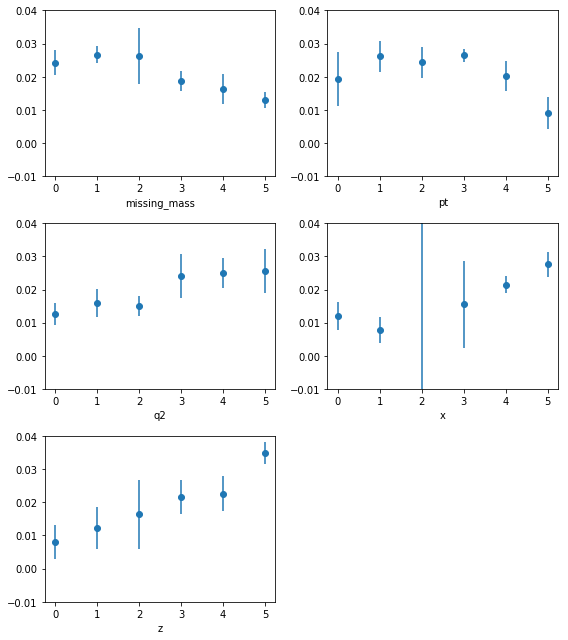

In [18]:
n_axes = fit_results['axis'].nunique()
n_cols = 2
n_rows = np.ceil(n_axes / n_cols) + 1
plt.figure( figsize = (n_cols * 4, n_rows * 3) )

i = 1
for axis in fit_results['axis'].unique():
    data_subset = fit_results.query('axis == "{}"'.format(axis))

    plt.subplot(n_rows, n_cols, i)
    plt.errorbar(
        data_subset['axis_bin'], 
        data_subset['par_0'],
        data_subset['err_0'],
        linestyle = '',
        marker = 'o'
    )
    plt.xlabel(axis)
    plt.ylim([-0.01, 0.04])
    i += 1
    
plt.tight_layout()